# Using Segmenter

In [1]:
from segmenter import Segmenter
from material import wte2, graphene
import numpy as np
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
# Dictionaries telling the Segmenter how to color image after labelling

colors_by_layer = {
    'monolayer': np.array([0,163,255])/255.0, # Blue
    'bilayer': np.array([29,255,0])/255.0, # Green
    'trilayer': np.array([198,22,22])/255.0, # Red
    'fewlayer': np.array([255,165,0])/255.0, # Orange
    'manylayer': np.array([255,165,0])/255.0, # Orange
    'bluish_layers': np.array([255,165,0])/255.0, # Orange
    'bulk': np.array([152,7,235])/255.0, # Purple
    'dirt': np.array([255, 255, 0])/255.0, # Yellow
    'more_bluish_layers': np.array([255, 255, 0])/255.0, # Yellow
    'bg': np.array([0, 0, 0])/255.0, # Uncolored
}


# Inputs to future AI model (Currently focusing on Monolayer, Bilayer, and >Bilayer for Segmentation)
number_by_layer = {
    'bg': 0,
    'monolayer': 1,
    'bilayer': 2,
    'trilayer': 3,
    'fewlayer': 3,
    'manylayer': 3,
    'bluish_layers':3,
    'more_bluish_layers':3,
    'bulk': 3,
    'dirt': 3,
}

## WTe2

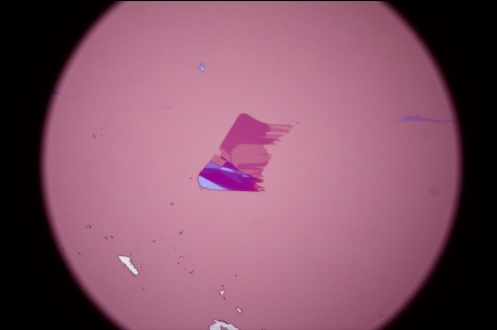

In [4]:
test_wte2_PIL = Image.open('test_images/wte2_28.jpg')
test_wte2 = np.array(test_wte2_PIL)
test_wte2_PIL

In [5]:
segmenter = Segmenter(test_wte2,
                        material=wte2,
                        size = test_wte2.shape[:2],
                        mask_colors=colors_by_layer,
                        magnification=100,
                        mask_numbers=number_by_layer
                    )

segmenter.go()

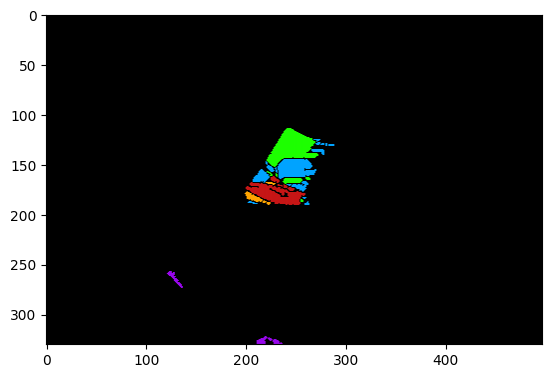

In [6]:
segmenter.prettify()
plt.imshow(segmenter.colored_masks)

## Graphene

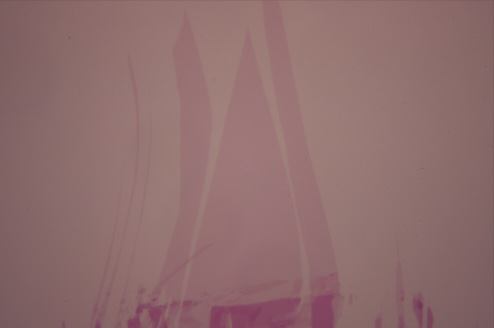

In [3]:
test_graphene_PIL = Image.open('test_images/graphene.jpg')
test_graphene = np.array(test_graphene_PIL)
test_graphene_PIL

In [8]:
from material import graphene

segmenter = Segmenter(test_graphene,
                        material=graphene,
                        size = test_graphene.shape[:2],
                        mask_colors=colors_by_layer,
                        magnification=100,
                        mask_numbers=number_by_layer
                    )

segmenter.shift_multiplier = 0
segmenter.max_area = 100000
segmenter.go()

/Users/mayanksengupta/Desktop/2d_World/material.py:22: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 85717 negative Z values that have been clipped to zero
  return lab2rgb(lab)


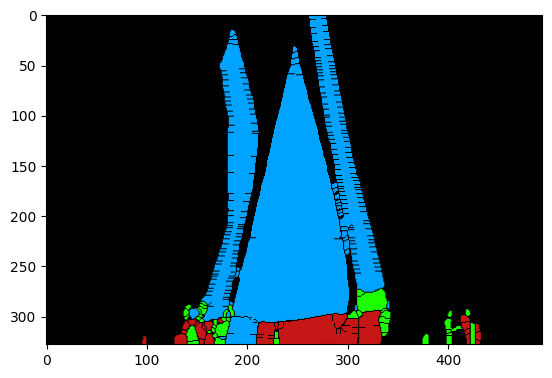

In [9]:
segmenter.prettify()
plt.imshow(segmenter.colored_masks)

### Convert to Training Data for a Neural Network

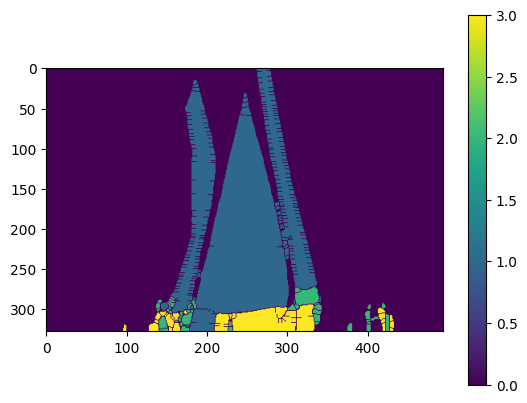

In [11]:
segmenter.number()
plt.imshow(segmenter.numbered_masks)
plt.colorbar()
plt.show()